# NetworkX - beagle Testing
------------------

- Try to get KarateClub working.

# Preparation

In [1]:
import pandas as pd, numpy as np, networkx as nx
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.linear_model.logistic import LogisticRegression
pd.options.display.max_columns = 500
pd.options.display.max_colwidth = 500

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df_zeek = pd.read_json("combined_zeek.log", lines = True)
df_zeek.replace('nan', np.nan, inplace=True)
print(type(df_zeek))
print(df_zeek.shape)
#print(df_zeek.EventID.value_counts())
df_zeek.head()

<class 'pandas.core.frame.DataFrame'>
(2140, 148)


,@stream,@system,@proc,ts,uid,id_orig_h,id_orig_p,id_resp_h,id_resp_p,proto,service,duration,orig_bytes,resp_bytes,conn_state,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,orig_l2_addr,resp_l2_addr,rtt,named_pipe,endpoint,operation,trans_id,query,qclass,qclass_name,qtype,qtype_name,rcode,rcode_name,AA,TC,RD,RA,Z,answers,TTLs,rejected,analyzer,failure_reason,fuid,tx_hosts,rx_hosts,conn_uids,source,depth,analyzers,mime_type,filename,is_orig,seen_bytes,total_bytes,missing_bytes,overflow_bytes,timedout,md5,sha1,request_type,client,success,error_msg,till,forwardable,renewable,cipher,note,msg,sub,src,dst,p,actions,suppress_for,action,path,name,size,times_modified,times_accessed,times_created,times_changed,share_type,version,curve,server_name,resumed,established,cert_chain_fuids,client_cert_chain_fuids,subject,issuer,validation_status,resp_certificate_sha1,ja3,ja3s,notice,peer,addl,id,certificate_version,certificate_serial,certificate_subject,certificate_issuer,certificate_not_valid_before,certificate_not_valid_after,certificate_key_alg,certificate_sig_alg,certificate_key_type,certificate_key_length,certificate_exponent,basic_constraints_ca,extracted,extracted_cutoff,trans_depth,method,host,uri,user_agent,request_body_len,response_body_len,status_code,status_msg,tags,resp_fuids,resp_mime_types,client_header_names,orig_fuids,orig_mime_types,machine,compile_ts,os,subsystem,is_exe,is_64bit,uses_aslr,uses_dep,uses_code_integrity,uses_seh,has_import_table,has_export_table,has_cert_table,has_debug_data,section_names
0,conn,bobs.bigwheel.local,zeek,1.588205e+09,Cvf4XX17hSAgXDdGEd,10.0.1.6,54243.0,10.0.0.4,53.0,udp,dns,0.001528,39.0,55.0,SF,0.0,Dd,1.0,67.0,1.0,83.0,00:0d:3a:13:e3:69,12:34:56:78:9a:bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,conn,bobs.bigwheel.local,zeek,1.588205e+09,CJ21Le4zsTUcyKKi98,10.0.1.6,56880.0,10.0.0.4,445.0,tcp,"gssapi,smb,krb",10.761077,4020.0,1681.0,RSTO,0.0,ShADdaR,12.0,1307.0,11.0,2133.0,00:0d:3a:13:e3:69,12:34:56:78:9a:bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,conn,bobs.bigwheel.local,zeek,1.588205e+09,CnOP7t1eGGHf6LFfuk,10.0.1.6,65108.0,10.0.0.4,53.0,udp,dns,0.001599,36.0,104.0,SF,0.0,Dd,1.0,64.0,1.0,132.0,00:0d:3a:13:e3:69,12:34:56:78:9a:bc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,conn,bobs.bigwheel.local,zeek,1.588205e+09,CvxbPE3MuO7boUdSc8,10.0.1.6,138.0,10.0.1.255,138.0,udp,NaN,NaN,NaN,NaN,S0,0.0,D,1.0,229.0,0.0,0.0,00:0d:3a:13:e3:69,ff:ff:ff:ff:ff:ff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [3]:
df_label = pd.read_json('./df_labelled_coalesce.json', lines=True)
df_label['TP_Binary'] = df_label.TP_Label!='0'
df_label.replace('-', np.nan, inplace=True)
print(type(df_label))
print(df_label.shape)
print(df_label.EventID.value_counts())
df_label.head(1)

<class 'pandas.core.frame.DataFrame'>
(198760, 390)
12       61158
10       39286
7        20259
13       17542
4658     10973
         ...  
172          1
46           1
50103        1
306          1
41           1
Name: EventID, Length: 165, dtype: int64


,@timestamp,@version,Category,Channel,EventID,EventReceivedTime,EventTime,EventType,ExecutionProcessID,Hostname,IpAddress,IpPort,Keywords,LogonGuid,Message,Opcode,OpcodeValue,ProviderGuid,RecordNumber,ServiceName,ServiceSid,Severity,SeverityValue,SourceModuleName,SourceModuleType,SourceName,Status,TargetDomainName,TargetUserName,Task,ThreadID,TicketEncryptionType,TicketOptions,TransmittedServices,Version,host,port,tags,TP_Label,Action,ActivityID,CalloutKey,CalloutName,ChangeType,Conditions,FilterId,FilterKey,FilterName,FilterType,LayerId,LayerKey,LayerName,ProcessId,ProviderKey,ProviderName,UserName,UserSid,Weight,AccessList,AccessMask,AccessReason,HandleId,ObjectName,ObjectServer,ObjectType,PrivilegeList,ProcessName,ResourceAttributes,RestrictedSidCount,SubjectDomainName,SubjectLogonId,SubjectUserName,SubjectUserSid,TransactionId,ShareLocalPath,ShareName,RelativeTargetName,CommandLine,MandatoryLabel,NewProcessId,NewProcessName,ParentProcessName,TargetLogonId,TargetUserSid,TokenElevationType,Service,DisabledPrivilegeList,EnabledPrivilegeList,CallerProcessId,CallerProcessName,TargetSid,AuthenticationPackageName,ElevatedToken,ImpersonationLevel,KeyLength,LmPackageName,LogonProcessName,LogonType,RestrictedAdminMode,TargetLinkedLogonId,TargetOutboundDomainName,TargetOutboundUserName,VirtualAccount,WorkstationName,SourceHandleId,SourceProcessId,TargetHandleId,TargetProcessId,AccountName,AccountType,ContextInfo,Domain,Payload,UserID,NewThreadId,RuleName,SourceImage,SourceProcessGuid,StartAddress,StartFunction,StartModule,TargetImage,TargetProcessGuid,UtcTime,MessageNumber,MessageTotal,Path,ScriptBlockId,ScriptBlockText,AlgorithmName,KeyName,KeyType,Operation,ReturnCode,Archived,Hashes,Image,IsExecutable,ProcessGuid,TargetFilename,User,CreationUtcTime,Company,Description,FileVersion,ImageLoaded,OriginalFileName,Product,Signature,SignatureStatus,Signed,DestinationHostname,DestinationIp,DestinationIsIpv6,DestinationPort,DestinationPortName,Initiated,Protocol,SourceHostname,SourceIp,SourceIsIpv6,SourcePort,SourcePortName,NewSd,OldSd,PipeName,CurrentDirectory,IntegrityLevel,LogonId,ParentCommandLine,ParentImage,ParentProcessGuid,ParentProcessId,TerminalSessionId,CallTrace,GrantedAccess,SourceProcessGUID,SourceThreadId,TargetProcessGUID,Device,TargetObject,Details,Application,FilterRTID,LayerRTID,SourceAddress,DestAddress,DestPort,Direction,RemoteMachineID,RemoteUserID,BootMenuPolicy,NewValue,NewValueType,ObjectValueName,OldValue,OldValueType,OperationType,ProfileUsed,RuleId,QueryName,QueryResults,QueryStatus,PreviousCreationUtcTime,EventCountTotal,EventIdx,GroupMembership,param1,Properties,Hash,PreAuthType,ClientProcessId,CountOfCredentialsReturned,ProcessCreationTime,ReadOperation,TargetName,Type,CalloutId,CalloutType,CorruptionActionState,DeviceName,DriveName,Config,IsTestConfig,DirtyPages,HiveName,HiveNameLength,KeysUpdated,PackageName,Workstation,DeviceNameLength,DeviceTime,DeviceVersionMajor,DeviceVersionMinor,FinalStatus,UserData,ServiceAccount,ServiceFileName,ServiceStartType,ServiceType,param10,param11,param2,param3,param4,param5,param6,param7,param8,param9,SubLayerKey,SubLayerName,SubLayerType,Default SD String:,ClassId,ClassName,CompatibleIds,DeviceDescription,DeviceId,LocationInformation,VendorIds,TargetProcessName,SecurityPackageName,AdditionalInfo,AdditionalInfo2,ProviderType,RuleAttr,AdapterName,AdapterSuffixName,DnsServerList,ErrorCode,Ipaddress,Sent UpdateServer,TaskContentNew,TaskName,ActiveProfile,MiniportName,MiniportNameLen,GroupPolicyApplied,LogDroppedPacketsEnabled,LogSuccessfulConnectionsEnabled,MulticastFlowsEnabled,OperationMode,Profile,RemoteAdminEnabled,TargetInfo,TargetLogonGuid,TargetServerName,ClientCreationTime,TimeSource,ImagePath,StartType,ProfileChanged,BootType,LoadOptions,EntryCount,KeyFilePath,ProviderContextKey,ProviderContextName,ProviderContextType,DwordVal,InterfaceGuid,InterfaceName,NewProfile,OldProfile,InstanceId,MaxRunspaces,MinRunspaces,CurrentStratumNumber,TimeSourceRefId,ReasonForRejection,

In [4]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
#    In [9]: result = pd.concat([df1, df4], axis=1, sort=False)
df_label = df_label.append(df_zeek, ignore_index=True, sort=False)

In [5]:
df_label.shape

(200900, 536)

In [6]:
df_label.head(1)

,@timestamp,@version,Category,Channel,EventID,EventReceivedTime,EventTime,EventType,ExecutionProcessID,Hostname,IpAddress,IpPort,Keywords,LogonGuid,Message,Opcode,OpcodeValue,ProviderGuid,RecordNumber,ServiceName,ServiceSid,Severity,SeverityValue,SourceModuleName,SourceModuleType,SourceName,Status,TargetDomainName,TargetUserName,Task,ThreadID,TicketEncryptionType,TicketOptions,TransmittedServices,Version,host,port,tags,TP_Label,Action,ActivityID,CalloutKey,CalloutName,ChangeType,Conditions,FilterId,FilterKey,FilterName,FilterType,LayerId,LayerKey,LayerName,ProcessId,ProviderKey,ProviderName,UserName,UserSid,Weight,AccessList,AccessMask,AccessReason,HandleId,ObjectName,ObjectServer,ObjectType,PrivilegeList,ProcessName,ResourceAttributes,RestrictedSidCount,SubjectDomainName,SubjectLogonId,SubjectUserName,SubjectUserSid,TransactionId,ShareLocalPath,ShareName,RelativeTargetName,CommandLine,MandatoryLabel,NewProcessId,NewProcessName,ParentProcessName,TargetLogonId,TargetUserSid,TokenElevationType,Service,DisabledPrivilegeList,EnabledPrivilegeList,CallerProcessId,CallerProcessName,TargetSid,AuthenticationPackageName,ElevatedToken,ImpersonationLevel,KeyLength,LmPackageName,LogonProcessName,LogonType,RestrictedAdminMode,TargetLinkedLogonId,TargetOutboundDomainName,TargetOutboundUserName,VirtualAccount,WorkstationName,SourceHandleId,SourceProcessId,TargetHandleId,TargetProcessId,AccountName,AccountType,ContextInfo,Domain,Payload,UserID,NewThreadId,RuleName,SourceImage,SourceProcessGuid,StartAddress,StartFunction,StartModule,TargetImage,TargetProcessGuid,UtcTime,MessageNumber,MessageTotal,Path,ScriptBlockId,ScriptBlockText,AlgorithmName,KeyName,KeyType,Operation,ReturnCode,Archived,Hashes,Image,IsExecutable,ProcessGuid,TargetFilename,User,CreationUtcTime,Company,Description,FileVersion,ImageLoaded,OriginalFileName,Product,Signature,SignatureStatus,Signed,DestinationHostname,DestinationIp,DestinationIsIpv6,DestinationPort,DestinationPortName,Initiated,Protocol,SourceHostname,SourceIp,SourceIsIpv6,SourcePort,SourcePortName,NewSd,OldSd,PipeName,CurrentDirectory,IntegrityLevel,LogonId,ParentCommandLine,ParentImage,ParentProcessGuid,ParentProcessId,TerminalSessionId,CallTrace,GrantedAccess,SourceProcessGUID,SourceThreadId,TargetProcessGUID,Device,TargetObject,Details,Application,FilterRTID,LayerRTID,SourceAddress,DestAddress,DestPort,Direction,RemoteMachineID,RemoteUserID,BootMenuPolicy,NewValue,NewValueType,ObjectValueName,OldValue,OldValueType,OperationType,ProfileUsed,RuleId,QueryName,QueryResults,QueryStatus,PreviousCreationUtcTime,EventCountTotal,EventIdx,GroupMembership,param1,Properties,Hash,PreAuthType,ClientProcessId,CountOfCredentialsReturned,ProcessCreationTime,ReadOperation,TargetName,Type,CalloutId,CalloutType,CorruptionActionState,DeviceName,DriveName,Config,IsTestConfig,DirtyPages,HiveName,HiveNameLength,KeysUpdated,PackageName,Workstation,DeviceNameLength,DeviceTime,DeviceVersionMajor,DeviceVersionMinor,FinalStatus,UserData,ServiceAccount,ServiceFileName,ServiceStartType,ServiceType,param10,param11,param2,param3,param4,param5,param6,param7,param8,param9,...,TargetLogonGuid,TargetServerName,ClientCreationTime,TimeSource,ImagePath,StartType,ProfileChanged,BootType,LoadOptions,EntryCount,KeyFilePath,ProviderContextKey,ProviderContextName,ProviderContextType,DwordVal,InterfaceGuid,InterfaceName,NewProfile,OldProfile,InstanceId,MaxRunspaces,MinRunspaces,CurrentStratumNumber,TimeSourceRefId,ReasonForRejection,Active,EdgeTraversal,EmbeddedContext,Flags,LocalAddresses,LocalOnlyMapped,LooseSourceMapped,ModifyingApplication,ModifyingUser,Origin,Profiles,RemoteAddresses,RuleStatus,SchemaVersion,SecurityOptions,CountNew,CountOld,EnabledNew,UpdateReason,NewTime,PreviousTime,NotificationPackageName,ShutdownActionType,ShutdownEventCode,ShutdownReason,BootMode,BuildVersion,MajorVersion,MinorVersion,QfeVersion,ServiceVersion,StartTime,EnableDisableReason,VsmPolicy,DCName,ProcessingMode,ProcessingTimeInMilliseconds,SupportInfo1,SupportInfo2,Gr

In [7]:
df_label.tail(1)

,@timestamp,@version,Category,Channel,EventID,EventReceivedTime,EventTime,EventType,ExecutionProcessID,Hostname,IpAddress,IpPort,Keywords,LogonGuid,Message,Opcode,OpcodeValue,ProviderGuid,RecordNumber,ServiceName,ServiceSid,Severity,SeverityValue,SourceModuleName,SourceModuleType,SourceName,Status,TargetDomainName,TargetUserName,Task,ThreadID,TicketEncryptionType,TicketOptions,TransmittedServices,Version,host,port,tags,TP_Label,Action,ActivityID,CalloutKey,CalloutName,ChangeType,Conditions,FilterId,FilterKey,FilterName,FilterType,LayerId,LayerKey,LayerName,ProcessId,ProviderKey,ProviderName,UserName,UserSid,Weight,AccessList,AccessMask,AccessReason,HandleId,ObjectName,ObjectServer,ObjectType,PrivilegeList,ProcessName,ResourceAttributes,RestrictedSidCount,SubjectDomainName,SubjectLogonId,SubjectUserName,SubjectUserSid,TransactionId,ShareLocalPath,ShareName,RelativeTargetName,CommandLine,MandatoryLabel,NewProcessId,NewProcessName,ParentProcessName,TargetLogonId,TargetUserSid,TokenElevationType,Service,DisabledPrivilegeList,EnabledPrivilegeList,CallerProcessId,CallerProcessName,TargetSid,AuthenticationPackageName,ElevatedToken,ImpersonationLevel,KeyLength,LmPackageName,LogonProcessName,LogonType,RestrictedAdminMode,TargetLinkedLogonId,TargetOutboundDomainName,TargetOutboundUserName,VirtualAccount,WorkstationName,SourceHandleId,SourceProcessId,TargetHandleId,TargetProcessId,AccountName,AccountType,ContextInfo,Domain,Payload,UserID,NewThreadId,RuleName,SourceImage,SourceProcessGuid,StartAddress,StartFunction,StartModule,TargetImage,TargetProcessGuid,UtcTime,MessageNumber,MessageTotal,Path,ScriptBlockId,ScriptBlockText,AlgorithmName,KeyName,KeyType,Operation,ReturnCode,Archived,Hashes,Image,IsExecutable,ProcessGuid,TargetFilename,User,CreationUtcTime,Company,Description,FileVersion,ImageLoaded,OriginalFileName,Product,Signature,SignatureStatus,Signed,DestinationHostname,DestinationIp,DestinationIsIpv6,DestinationPort,DestinationPortName,Initiated,Protocol,SourceHostname,SourceIp,SourceIsIpv6,SourcePort,SourcePortName,NewSd,OldSd,PipeName,CurrentDirectory,IntegrityLevel,LogonId,ParentCommandLine,ParentImage,ParentProcessGuid,ParentProcessId,TerminalSessionId,CallTrace,GrantedAccess,SourceProcessGUID,SourceThreadId,TargetProcessGUID,Device,TargetObject,Details,Application,FilterRTID,LayerRTID,SourceAddress,DestAddress,DestPort,Direction,RemoteMachineID,RemoteUserID,BootMenuPolicy,NewValue,NewValueType,ObjectValueName,OldValue,OldValueType,OperationType,ProfileUsed,RuleId,QueryName,QueryResults,QueryStatus,PreviousCreationUtcTime,EventCountTotal,EventIdx,GroupMembership,param1,Properties,Hash,PreAuthType,ClientProcessId,CountOfCredentialsReturned,ProcessCreationTime,ReadOperation,TargetName,Type,CalloutId,CalloutType,CorruptionActionState,DeviceName,DriveName,Config,IsTestConfig,DirtyPages,HiveName,HiveNameLength,KeysUpdated,PackageName,Workstation,DeviceNameLength,DeviceTime,DeviceVersionMajor,DeviceVersionMinor,FinalStatus,UserData,ServiceAccount,ServiceFileName,ServiceStartType,ServiceType,param10,param11,param2,param3,param4,param5,param6,param7,param8,param9,...,TargetLogonGuid,TargetServerName,ClientCreationTime,TimeSource,ImagePath,StartType,ProfileChanged,BootType,LoadOptions,EntryCount,KeyFilePath,ProviderContextKey,ProviderContextName,ProviderContextType,DwordVal,InterfaceGuid,InterfaceName,NewProfile,OldProfile,InstanceId,MaxRunspaces,MinRunspaces,CurrentStratumNumber,TimeSourceRefId,ReasonForRejection,Active,EdgeTraversal,EmbeddedContext,Flags,LocalAddresses,LocalOnlyMapped,LooseSourceMapped,ModifyingApplication,ModifyingUser,Origin,Profiles,RemoteAddresses,RuleStatus,SchemaVersion,SecurityOptions,CountNew,CountOld,EnabledNew,UpdateReason,NewTime,PreviousTime,NotificationPackageName,ShutdownActionType,ShutdownEventCode,ShutdownReason,BootMode,BuildVersion,MajorVersion,MinorVersion,QfeVersion,ServiceVersion,StartTime,EnableDisableReason,VsmPolicy,DCName,ProcessingMode,ProcessingTimeInMilliseconds,SupportInfo1,SupportInfo2,Gr

## Normalize Timestamp, IP/Port Columns
------------------

In [8]:
df_label['time_stamp'] = df_label['@timestamp'].apply(lambda x: (pd.Timestamp(x)))

In [9]:
df_label['time_stamp'] = df_label['time_stamp'].fillna(df_label['ts'].apply(lambda x: (pd.to_datetime(x, unit='s', utc=True))))

In [10]:
# Transform Host Data - Similar Data to Single Columns
df_label['Destination_IP'] = df_label['DestinationIp']
df_label['Destination_IP'] = df_label['Destination_IP'].fillna(df_label['DestAddress'])
df_label['Source_IP'] = df_label['IpAddress']
df_label['Source_IP'] = df_label['Source_IP'].fillna(df_label['SourceIp'])
df_label['Source_IP'] = df_label['Source_IP'].fillna(df_label['SourceAddress'])
df_label['Source_Port'] = df_label['IpPort']
df_label['Source_Port'] = df_label['Source_Port'].fillna(df_label['SourcePort'])
df_label['Destination_Port'] = df_label['DestinationPort']
df_label['Destination_Port'] = df_label['Destination_Port'].fillna(df_label['DestPort'])

In [11]:
# Transform Network Data - Similar Data to Single Columns
df_label['Source_IP'] = df_label['Source_IP'].fillna(df_label['id_orig_h'])
df_label['Source_Port'] = df_label['Source_Port'].fillna(df_label['id_orig_p'])
df_label['Destination_IP'] = df_label['Destination_IP'].fillna(df_label['id_resp_h'])
df_label['Destination_Port'] = df_label['Destination_Port'].fillna(df_label['id_resp_p'])

## Beagle Column Formatting

In [12]:
df_label['EventData_ParentImage'] = df_label['ParentImage'].astype(object)
df_label['EventData_ParentProcessId'] = df_label['ParentProcessId']
df_label['EventData_ParentProcessGuid'] = df_label['ParentProcessGuid']
df_label['EventData_Image'] = df_label['Image'].astype(object)
df_label['EventData_CommandLine'] = df_label['CommandLine'].astype(object)
df_label['EventData_Hashes'] = df_label['Hashes'].astype(object)

df_label['Computer'] = df_label['Hostname'].astype(object)
df_label['EventData_User'] = df_label['User'].astype(object)
df_label['EventData_UtcTime'] = df_label['UtcTime']

df_label['EventData_ProcessGuid'] = df_label['ProcessGuid']
df_label['EventData_ProcessId'] = df_label['ProcessId']

df_label['EventData_DestinationIp'] = df_label['DestinationIp']
df_label['EventData_DestinationPort'] = df_label['DestinationPort']
df_label['EventData_Protocol'] = df_label['Protocol']
df_label['EventData_TargetFilename'] = df_label['TargetFilename']

df_label['EventData_TargetObject'] = df_label['TargetObject']
df_label['EventData_EventType'] = df_label['EventType']
#df_label['EventData_Details'] = df_label['ProcessId']

## Manual Recurse Ancestor Chain Functions

In [13]:
def eval_ancestor_chain(G, starting_guid):
    for (p, d) in G.nodes(data=True):
        if 'process_guid' in d['properties'].keys():
            if starting_guid in d['properties']['process_guid']:
                selected_node = p
                
    #ancestors = nx.ancestors(G, selected_node)
    malicious_ancestors = [selected_node]
    for i in nx.ancestors(G, selected_node):
        if(G.node[i]['_node_type'] == 'Process'):
            print("==========================================")
            print("Node Data:")
            print("==========================================")
            print(G.node[i])
            print("==========================================")
            answer = None
            while answer not in ("yes", "no"):
                answer = input("Malicious? Enter yes or no: ")
                if answer == "yes":
                    # Do this.
                    malicious_ancestors.append(i)
                elif answer == "no":
                    # Do that.
                    return malicious_ancestors
                else:
                    print("Please enter yes or no.")
    return malicious_ancestors

def determine_malicious_root_proc(G, starting_guid):
    malicious_ancestors = eval_ancestor_chain(G, starting_guid)
    print("")
    print("##########################################")
    print("Confirm this as the senior malicious node?")
    print("##########################################")
    print("Node Data:")
    print("==========================================")
    print(G.node[malicious_ancestors[-1]])
    print("==========================================")
    print("Edge Out Data:")
    print("==========================================")
    for i in G.out_edges(malicious_ancestors[-1], data=True):
        if i[2]['type'] == 'Launched':
            print(i[2]['type'])
            print(G.node[i[1]])
            print("==========================================")
    answer = None
    while answer not in ("yes", "no"):
        answer = input("Malicious? Enter yes or no: ")
        if answer == "yes":
            # Do this.
            return malicious_ancestors[-1]
        elif answer == "no":
            # Do that.
            print("Re-run the eval_ancestor chain")
            malicious_root_ancestor = determine_malicious_root_proc(G, starting_guid)
            return malicious_root_ancestor
        else:
            print("Please enter yes or no.")
            
def get_ancestor_descendant_graph(G, malicious_root_ancestor):
    print(malicious_root_ancestor)

    descendants = nx.descendants(G, malicious_root_ancestor) #Returns all nodes reachable from source in G.
    print(len(descendants))

    ancestors = nx.ancestors(G, malicious_root_ancestor)
    print(len(ancestors))

    suspected_malicious = list(ancestors) + list(descendants)
    suspected_malicious.append(malicious_root_ancestor)
    print(len(suspected_malicious))

    H = G.subgraph(suspected_malicious)
    return H, malicious_root_ancestor, ancestors, descendants

def print_ancestor_descendant_graph(H, malicious_root_ancestor, ancestors, descendants):
    from matplotlib.pyplot import figure
    # Why are there orphaned nodes? I forgot to add the OG node. Fixed.
    # https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
    #fig = plt.Figure()
    figure(figsize=(15, 12))
    pos=nx.kamada_kawai_layout(H) # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(H,pos,
                       nodelist=list(ancestors),
                       node_color='r',
                       #node_size=500,
                       label='ancestors',
                   alpha=0.8)
    nx.draw_networkx_nodes(H,pos,
                       nodelist=list(descendants),
                       node_color='b',
                       #node_size=500,
                       label='descendants',
                   alpha=0.8)
    nx.draw_networkx_nodes(H,pos,
                       nodelist=[malicious_root_ancestor],
                       node_color='g',
                       #node_size=500,
                       label='starting-point',
                   alpha=0.8)

    # edges
    nx.draw_networkx_edges(H,pos,width=1.0,alpha=0.5)

    #plt.legend()
    plt.legend(loc='upper left')
    #fig.update_layout(legend=dict(x=-.1, y=1.2))
    plt.axis('off')
    print("Saving as: ancestor_descendants_" + str(malicious_root_ancestor) + ".png")
    plt.savefig("ancestor_descendants_" + str(malicious_root_ancestor) + ".png") # save as png
    plt.show() # display
    
def get_ancestor_descendant_types(H):
    file_nodes = []
    for (p, d) in H.nodes(data=True):
        if d['_node_type']=='File':
            file_nodes.append(p)
    len(file_nodes)

    proc_nodes = []
    for (p, d) in H.nodes(data=True):
        if d['_node_type']=='Process':
            proc_nodes.append(p)
    len(proc_nodes)

    ip_nodes = []
    for (p, d) in H.nodes(data=True):
        if d['_node_type']=='IP Address':
            ip_nodes.append(p)
    len(ip_nodes)
    
    return file_nodes, proc_nodes, ip_nodes

def print_ancestor_descendant_type_graph(H, malicious_root_ancestor, file_nodes, proc_nodes, ip_nodes):
    # Why are there orphaned nodes? I forgot to add the OG node. Fixed.
    # https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
    #fig = plt.Figure()
    figure(figsize=(15, 12))
    pos=nx.kamada_kawai_layout(H) # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(H,pos,
                           nodelist=file_nodes,
                           node_color='r',
                           #node_size=500,
                           label='file_nodes',
                       alpha=0.8)
    nx.draw_networkx_nodes(H,pos,
                           nodelist=proc_nodes,
                           node_color='b',
                           #node_size=500,
                           label='proc_nodes',
                       alpha=0.8)
    nx.draw_networkx_nodes(H,pos,
                           nodelist=ip_nodes,
                           node_color='g',
                           #node_size=500,
                           label='ip_nodes',
                       alpha=0.8)

    # edges
    nx.draw_networkx_edges(H,pos,width=1.0,alpha=0.5)

    #plt.legend()
    plt.legend(loc='upper left')
    #fig.update_layout(legend=dict(x=-.1, y=1.2))
    plt.axis('off')
    print("Saving as: ancestor_descendants_nodeType_" + str(malicious_root_ancestor) + ".png")
    plt.savefig("ancestor_descendants_nodeType_" + str(malicious_root_ancestor) + ".png") # save as png
    plt.show() # display
    
def analyze_graph_vs_label_proc(H, proc_nodes):
    graph_bad_guids = []
    for i in proc_nodes:
        graph_bad_guids.append(H.node[i]['properties']['process_guid'])
    print(len(graph_bad_guids))
    #print(graph_bad_guids)
    
    label_bad_guids = df_label.loc[(df_label['TP_Binary'] == True) & (df_label.ProcessGuid.notnull())]['ProcessGuid'].unique()
    pd_all_guids = df_label.loc[(df_label.ProcessGuid.notnull()) & (df_label.CommandLine.notnull())][['ProcessGuid', 'Hostname', 'TP_Binary', 'CommandLine']]
    pd_all_guids['orig_label'] = False
    pd_all_guids['orig_label'].loc[pd_all_guids.ProcessGuid.isin(label_bad_guids)] = True

    pd_all_guids = pd_all_guids.drop(columns=['TP_Binary']).drop_duplicates()
    pd_all_guids['graph_label'] = False
    pd_all_guids['graph_label'].loc[pd_all_guids.ProcessGuid.isin(graph_bad_guids)] = True

    with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', None):
        display(pd_all_guids[['ProcessGuid', 'Hostname', 'orig_label', 'graph_label', 'CommandLine']].loc[((pd_all_guids.orig_label==True) | (pd_all_guids.graph_label==True))].sort_values(by=['orig_label', 'graph_label'], ascending=False))
        
def manual_recurse_pipeline(G, starting_point):
    malicious_root_ancestor = determine_malicious_root_proc(G, starting_point)
    print(malicious_root_ancestor)
    
    H, malicious_root_ancestor, ancestors, descendants = get_ancestor_descendant_graph(G, malicious_root_ancestor)
    
    #print_ancestor_descendant_graph(H, malicious_root_ancestor, ancestors, descendants)
    
    file_nodes, proc_nodes, ip_nodes = get_ancestor_descendant_types(H)
    
    #print_ancestor_descendant_type_graph(H, malicious_root_ancestor, file_nodes, proc_nodes, ip_nodes)
    
    #analyze_graph_vs_label_proc(H, proc_nodes)
    
    return H, malicious_root_ancestor, ancestors, descendants, file_nodes, proc_nodes, ip_nodes


# Testing Beagle

In [14]:
from beagle.backends import NetworkX
from beagle.transformers import SysmonTransformer

In [15]:
import os
import json
from typing import Dict, Generator, List

from beagle.datasources.base_datasource import DataSource
from beagle.transformers import GenericTransformer
from beagle.transformers.sysmon_transformer import SysmonTransformer

class JSONData(DataSource):
    """A generic data source which returns events one by one
    """

    name = "JSON Data"
    transformers = [SysmonTransformer]
    category = "Generic Data"

    def __init__(self, events: List[Dict]) -> None:
        self._events = events

    def events(self) -> Generator[dict, None, None]:
        for event in self._events:
            yield event

    def metadata(self) -> dict:
        return {}

In [16]:
from beagle.backends import NetworkX

NX = NetworkX.from_datasources(
    datasources=[
        JSONData(df_label.loc[(df_label['EventID']==1)].to_dict('records')),
        JSONData(df_label.loc[(df_label['EventID']==3)].to_dict('records')),
        JSONData(df_label.loc[(df_label['EventID']==11)].to_dict('records')),
    ]
)
G = NX.graph()

2020-07-03T03:25:17 | beagle.transformers.sysmon_transformer.__init__:15 | INFO | Created Sysmon Transformer.
2020-07-03T03:25:17 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-03T03:25:17 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-03T03:25:17 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-03T03:25:17 | beagle.transformers.base_transformer._consumer_thread:143 | WARNING | Error when parsing event, recieved exception 'float' object has no attribute 'split'
2020-07-03T03:25:17 | beagle.transformers.base_transformer.run:111 | INFO | Finished processing of events, created 1784 nodes.
2020-07-03T03:25:17 | beagle.transformers.base_transfor

In [17]:
G

In [18]:
graph_json = NetworkX.graph_to_json(G)

2020-07-03T03:25:17 | beagle.backends.networkx.__init__:56 | INFO | Initialized NetworkX Backend


In [19]:
from networkx.readwrite import json_graph

G = json_graph.node_link_graph(graph_json)

In [20]:
# Better. Now has all the data encoded in networkx format.
#list(G.nodes(data=True))

In [21]:
# So the ancestor descendent method his highly specific if the origin process is further down the causal chain. 
# Ideally, I want the seniormost ancestor process from the origin.

# Clustering

In [22]:
H = G.to_undirected()
[len(c) for c in sorted(nx.connected_components(H), key=len, reverse=True)]

[1975, 33, 15, 9, 9, 6, 4, 3]

In [23]:
graphs = list(nx.connected_component_subgraphs(H))

In [24]:
graphs

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


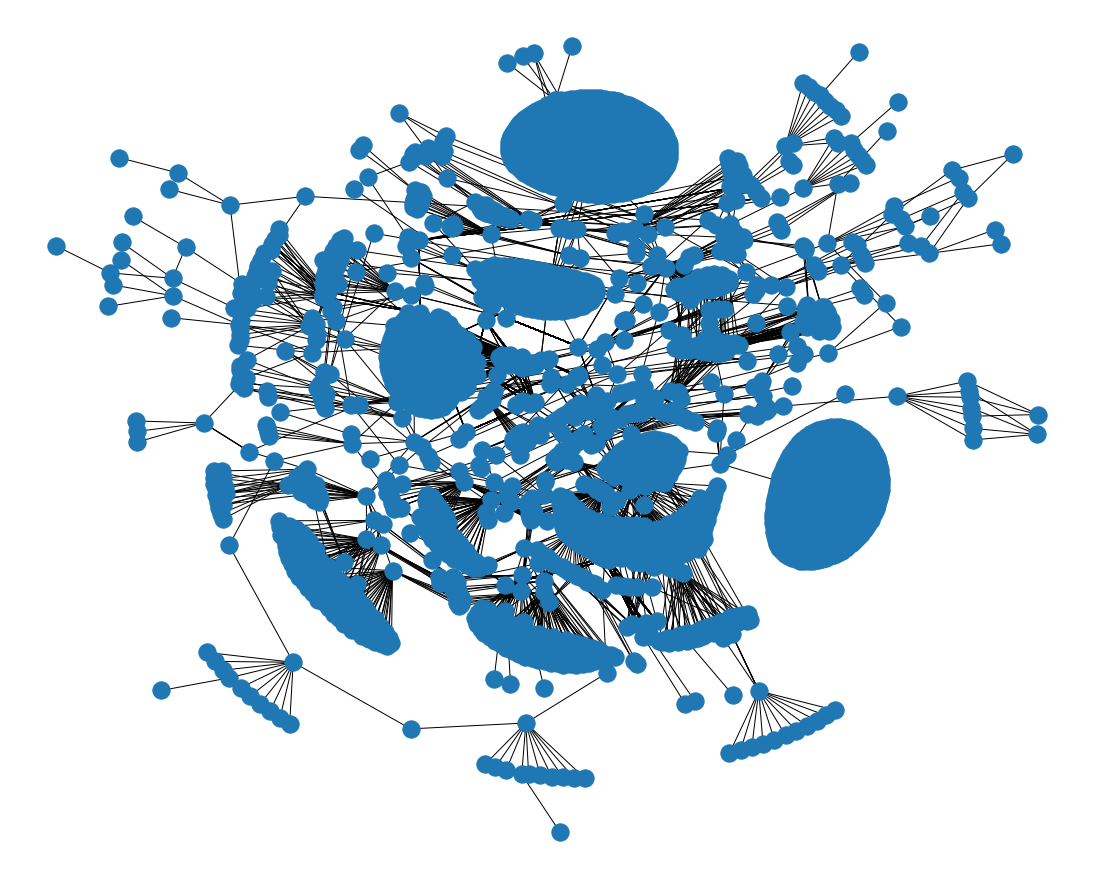

In [25]:
from matplotlib.pyplot import figure
figure(figsize=(15, 12))
nx.draw_kamada_kawai(graphs[0], with_labels=False)
plt.savefig("largest_connected_undirected_subgraph.png") # save as png
plt.show() # display

In [26]:
list(nx.isolates(G))

[]

In [27]:
#G.remove_nodes_from(list(nx.isolates(G)))

In [28]:
#G = G.to_undirected()
I = graphs[0]
I = nx.convert_node_labels_to_integers(I, first_label=0, ordering='default', label_attribute='Orig_Label')

In [29]:
#list(I.nodes(data=True))

[(0,
  {'properties': {'process_guid': '{47ab858c-cadc-5eac-2200-000000000400}',
    'host': 'SCRANTON.dmevals.local',
    'process_id': 1448,
    'user': None,
    'process_image': 'svchost.exe',
    'process_image_path': 'C:\\Windows\\System32',
    'command_line': None,
    'hashes': {},
    'process_path': 'C:\\Windows\\System32\\svchost.exe'},
   '_node_type': 'Process',
   '_node_class': 'SysMonProc',
   '_display': 'svchost.exe',
   '_color': '#FF0000',
   'Orig_Label': 4278830702570356715}),
 (1,
  {'properties': {'process_guid': '{47ab858c-e589-5eac-f803-000000000400}',
    'host': 'SCRANTON.dmevals.local',
    'process_id': 8288,
    'user': 'DMEVALS\\pbeesly',
    'process_image': 'taskhostw.exe',
    'process_image_path': 'C:\\Windows\\System32',
    'command_line': 'taskhostw.exe Install $(Arg0)',
    'hashes': {'sha1': '9245F36AA783167E0AFE948B1C0E8E7F3B81E3D4',
     'md5': '8AC325C757FA721B272ECEA19EBCF745',
     'sha256': '0BEC3128B241FA533DC5A9D3F62AA41323D205DEFC30DCD

In [30]:
#list(I.edges.data())

[(0,
  1,
  {'id': 1,
   'type': 'Launched',
   'properties': {'data': {'timestamp': '2020-05-02 03:14:17.672'}}}),
 (0,
  2,
  {'id': 2,
   'type': 'Launched',
   'properties': {'data': {'timestamp': '2020-05-02 03:01:42.046'}}}),
 (0,
  3,
  {'id': 3,
   'type': 'Launched',
   'properties': {'data': {'timestamp': '2020-05-02 03:02:44.901'}}}),
 (0,
  4,
  {'id': 4,
   'type': 'Launched',
   'properties': {'data': {'timestamp': '2020-05-02 03:05:30.108'}}}),
 (0,
  5,
  {'id': 5,
   'type': 'Launched',
   'properties': {'data': {'timestamp': '2020-05-02 03:02:44.870'}}}),
 (0,
  6,
  {'id': 6,
   'type': 'Launched',
   'properties': {'data': {'timestamp': '2020-05-02 03:18:34.907'}}}),
 (0, 7, {'id': 342, 'type': 'File Of', 'properties': {'data': None}}),
 (1, 107, {'id': 685, 'type': 'File Of', 'properties': {'data': None}}),
 (2,
  191,
  {'id': 7,
   'type': 'Launched',
   'properties': {'data': {'timestamp': '2020-05-02 03:01:42.054'}}}),
 (2, 921, {'id': 2064, 'type': 'File Of', 

In [31]:
nx.is_connected(I)

True

## Test NetworkX Clustering

### Test community.best_partition

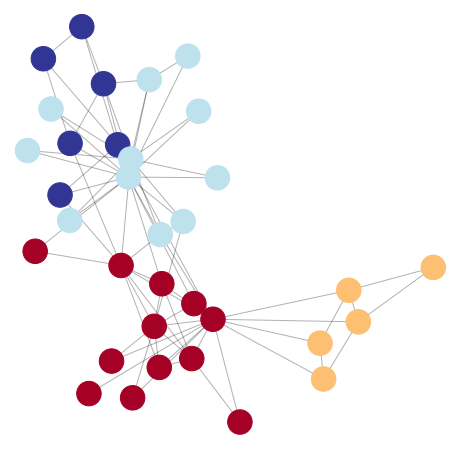

In [32]:
import networkx as nx
import community
import matplotlib.pyplot as plt

J = nx.karate_club_graph()  # load a default graph

partition = community.best_partition(J)  # compute communities

pos = nx.spring_layout(J)  # compute graph layout
plt.figure(figsize=(8, 8))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(J, pos, node_size=600, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(J, pos, alpha=0.3)
plt.show(J)

In [33]:
partition

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 1,
 6: 1,
 7: 0,
 8: 2,
 9: 0,
 10: 1,
 11: 0,
 12: 0,
 13: 0,
 14: 2,
 15: 2,
 16: 1,
 17: 0,
 18: 2,
 19: 0,
 20: 2,
 21: 0,
 22: 2,
 23: 3,
 24: 3,
 25: 3,
 26: 2,
 27: 3,
 28: 3,
 29: 2,
 30: 2,
 31: 3,
 32: 2,
 33: 2}

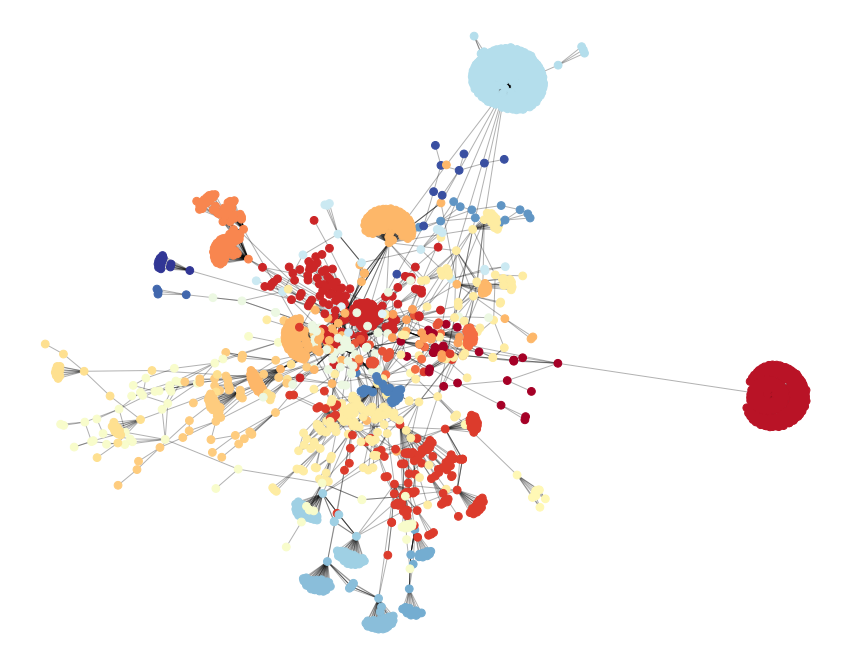

In [34]:
partition = community.best_partition(I)  # compute communities

pos = nx.spring_layout(I)  # compute graph layout
plt.figure(figsize=(15, 12))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(I, pos, node_size=60, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_edges(I, pos, alpha=0.3)
plt.savefig("cluster1.png") # save as png
plt.show(I)

In [36]:
starting_guid = '{47ab858c-e13c-5eac-a903-000000000400}'
for (p, d) in I.nodes(data=True):
    if 'process_guid' in d['properties'].keys():
        if starting_guid in d['properties']['process_guid']:
            selected_node = p
            break

In [37]:
selected_node

1342

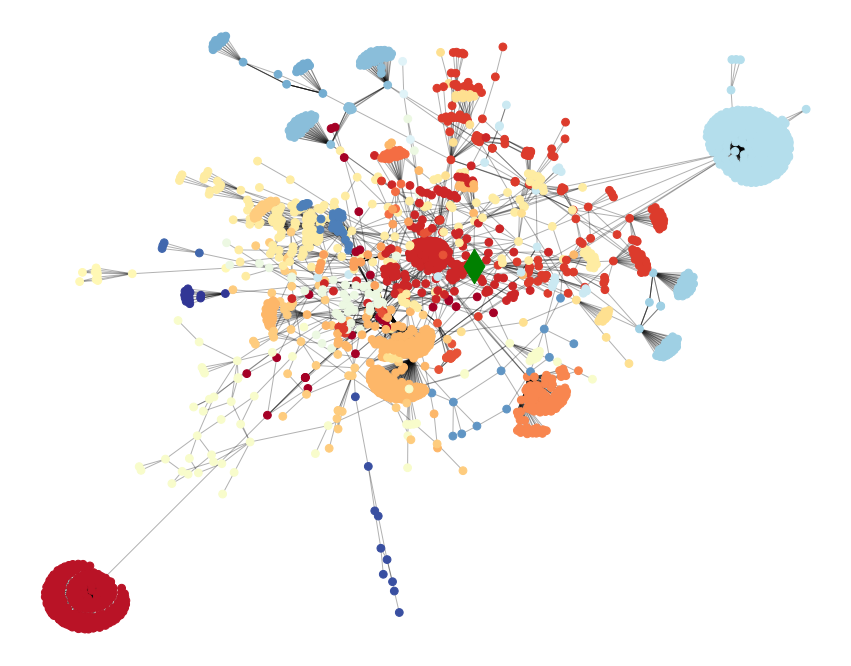

In [40]:
pos = nx.spring_layout(I)  # compute graph layout
plt.figure(figsize=(15, 12))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(I, pos, node_size=60, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_nodes(I, pos,
                       nodelist=[selected_node],
                       node_size=600, node_color='g', node_shape='d',
                       label='selected_node')
nx.draw_networkx_edges(I, pos, alpha=0.3)
plt.savefig("cluster2.png") # save as png
plt.show(I)

In [41]:
H, malicious_root_ancestor, ancestors, descendants, file_nodes, proc_nodes, ip_nodes = manual_recurse_pipeline(G, '{47ab858c-e13c-5eac-a903-000000000400}')

Node Data:
{'properties': {'process_guid': '{47ab858c-dac4-5eac-f202-000000000400}', 'host': 'SCRANTON.dmevals.local', 'process_id': 4440, 'user': nan, 'process_image': 'Explorer.EXE', 'process_image_path': 'C:\\windows', 'command_line': None, 'hashes': {}, 'process_path': 'C:\\windows\\Explorer.EXE'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'Explorer.EXE', '_color': '#FF0000'}


Malicious? Enter yes or no:  no



##########################################
Confirm this as the senior malicious node?
##########################################
Node Data:
{'properties': {'process_guid': '{47ab858c-e13c-5eac-a903-000000000400}', 'host': 'SCRANTON.dmevals.local', 'process_id': 8524, 'user': nan, 'process_image': 'â€®cod.3aka3.scr', 'process_image_path': 'C:\\ProgramData\\victim', 'command_line': '"C:\\ProgramData\\victim\\â€®cod.3aka3.scr" /S', 'hashes': {'sha1': '4B7FA56A4E85F88B98D11A6E018698AE3FBA5E62', 'md5': '9D1C5EF38E6073661C74660B3A71A76E', 'sha256': '0DF38A55D940F498478EB03683C94D4584236E100125B526A67650BA54DF4AE4', 'imphash': 'F00447512A354E59D39D2818AABA4A17'}, 'process_path': 'C:\\ProgramData\\victim\\â€®cod.3aka3.scr'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'â€®cod.3aka3.scr', '_color': '#FF0000'}
Edge Out Data:
Launched
{'properties': {'process_guid': '{47ab858c-e188-5eac-af03-000000000400}', 'host': 'SCRANTON.dmevals.local', 'process_id': 3152, 'user': 'DMEV

Malicious? Enter yes or no:  yes


2499773946457457286
2499773946457457286
489
4
494


In [54]:
descendants

{-9213877843652880733,
 -9180565219542319596,
 -9145024449359058298,
 -9086821335639873692,
 -9025990316123896052,
 -9016963190035598303,
 -8843249246447367491,
 -8713806606070935020,
 -8709937831651296181,
 -8690718049216015433,
 -8665795532586786090,
 -8614656855724528227,
 -8581622350801175820,
 -8567646639256226211,
 -8558471499427256043,
 -8554098938710042896,
 -8422335111130332459,
 -8408315699083829128,
 -8277276661407361921,
 -8268669493338187746,
 -8264017336187247117,
 -8261037198503491194,
 -8167624389067201963,
 -8156415507770763851,
 -8127237358855177011,
 -8112839124732597400,
 -8092217881730166727,
 -8078736364860213816,
 -8075726947533485507,
 -8058881878779984782,
 -8050312671215297707,
 -8019609543385731185,
 -7983744187079775509,
 -7961349023724079161,
 -7936699549312003350,
 -7885272076215427435,
 -7878892182578041168,
 -7838257039671895379,
 -7769091587244975610,
 -7739494643309538473,
 -7728315137467799458,
 -7725784858628501922,
 -7713746181983949616,
 -770025755

In [55]:
proc_nodes_guids = []
for i in descendants:
    if 'process_guid' in H.node[i]['properties'].keys():
        proc_nodes_guids.append(H.node[i]['properties']['process_guid'])
#proc_nodes_guids
proc_nodes_nodeIDs = []
for (p, d) in I.nodes(data=True):
    if 'process_guid' in d['properties'].keys():
        if d['properties']['process_guid'] in proc_nodes_guids:
            proc_nodes_nodeIDs.append(p)

In [56]:
proc_nodes_nodeIDs

[185,
 207,
 213,
 219,
 222,
 224,
 226,
 279,
 280,
 281,
 283,
 284,
 286,
 287,
 288,
 679,
 680,
 681,
 682,
 815,
 816,
 817,
 818,
 819,
 898,
 972,
 977,
 1058,
 1059,
 1060,
 1061,
 1235,
 1238]

/home/jake/miniconda3/envs/py3msc/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


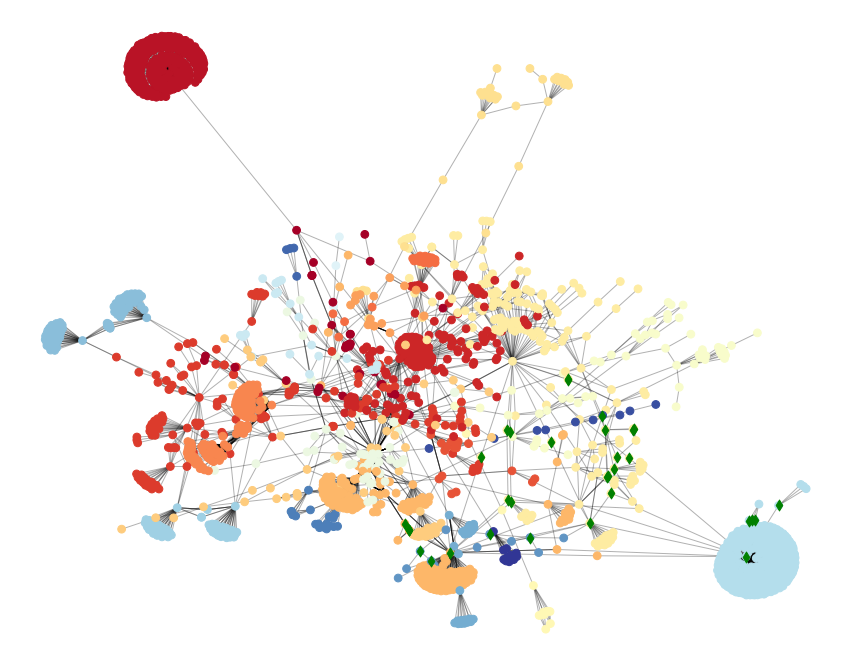

In [57]:
pos = nx.spring_layout(I)  # compute graph layout
plt.figure(figsize=(15, 12))  # image is 8 x 8 inches
plt.axis('off')
nx.draw_networkx_nodes(I, pos, node_size=60, cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
nx.draw_networkx_nodes(I, pos,
                       nodelist=proc_nodes_nodeIDs,
                       node_size=60, node_color='g', node_shape='d',
                       label='selected_node')
nx.draw_networkx_edges(I, pos, alpha=0.3)
plt.savefig("cluster3.png") # save as png
plt.show(I)

In [59]:
# 1975 communities? -> node count.
len(partition)

1975

In [63]:
# 26 Communities
uniqueValues = set(partition.values())
uniqueValues

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25}

In [69]:
nx.is_weakly_connected(G)

False

In [66]:
nx.is_strongly_connected(G)

False

In [70]:
nx.pagerank(I, alpha=0.9)

NetworkXNotImplemented: not implemented for multigraph type

In [73]:
c_degree = nx.degree_centrality(I)
c_degree

{0: 0.003546099290780142,
 1: 0.0010131712259371835,
 2: 0.0015197568389057753,
 3: 0.0010131712259371835,
 4: 0.0010131712259371835,
 5: 0.1707193515704154,
 6: 0.0010131712259371835,
 7: 0.050658561296859174,
 8: 0.0015197568389057753,
 9: 0.0010131712259371835,
 10: 0.002026342451874367,
 11: 0.010131712259371834,
 12: 0.014184397163120569,
 13: 0.011144883485309018,
 14: 0.004052684903748734,
 15: 0.0010131712259371835,
 16: 0.0010131712259371835,
 17: 0.0010131712259371835,
 18: 0.0010131712259371835,
 19: 0.0015197568389057753,
 20: 0.0010131712259371835,
 21: 0.0010131712259371835,
 22: 0.0010131712259371835,
 23: 0.0010131712259371835,
 24: 0.0010131712259371835,
 25: 0.0010131712259371835,
 26: 0.002026342451874367,
 27: 0.009118541033434652,
 28: 0.0010131712259371835,
 29: 0.0010131712259371835,
 30: 0.0010131712259371835,
 31: 0.0010131712259371835,
 32: 0.0010131712259371835,
 33: 0.0010131712259371835,
 34: 0.0010131712259371835,
 35: 0.0010131712259371835,
 36: 0.0010131

In [76]:
for i in proc_nodes_nodeIDs:
    print(str(i) + ":" + str(c_degree[i]))

185:0.0010131712259371835
207:0.0010131712259371835
213:0.0010131712259371835
219:0.0010131712259371835
222:0.0010131712259371835
224:0.0010131712259371835
226:0.0010131712259371835
279:0.1661600810536981
280:0.06585612968591692
281:0.011144883485309018
283:0.0030395136778115506
284:0.0030395136778115506
286:0.0030395136778115506
287:0.0025329280648429585
288:0.004559270516717326
679:0.002026342451874367
680:0.0010131712259371835
681:0.0010131712259371835
682:0.0010131712259371835
815:0.0015197568389057753
816:0.002026342451874367
817:0.0015197568389057753
818:0.0015197568389057753
819:0.0030395136778115506
898:0.0030395136778115506
972:0.003546099290780142
977:0.0015197568389057753
1058:0.0015197568389057753
1059:0.0010131712259371835
1060:0.0010131712259371835
1061:0.0015197568389057753
1235:0.0015197568389057753
1238:0.0015197568389057753


In [77]:
proc_nodes_guids = []
for i in proc_nodes:
    if 'process_guid' in H.node[i]['properties'].keys():
        proc_nodes_guids.append(H.node[i]['properties']['process_guid'])
#proc_nodes_guids
proc_nodes_nodeIDs = []
for (p, d) in I.nodes(data=True):
    if 'process_guid' in d['properties'].keys():
        if d['properties']['process_guid'] in proc_nodes_guids:
            proc_nodes_nodeIDs.append(p)

In [81]:
for i in proc_nodes_nodeIDs:
    #print(I.node[i])
    print(str(i) + ":" + str(c_degree[i]))

185:0.0010131712259371835
207:0.0010131712259371835
213:0.0010131712259371835
219:0.0010131712259371835
222:0.0010131712259371835
224:0.0010131712259371835
226:0.0010131712259371835
279:0.1661600810536981
280:0.06585612968591692
281:0.011144883485309018
283:0.0030395136778115506
284:0.0030395136778115506
286:0.0030395136778115506
287:0.0025329280648429585
288:0.004559270516717326
679:0.002026342451874367
680:0.0010131712259371835
681:0.0010131712259371835
682:0.0010131712259371835
815:0.0015197568389057753
816:0.002026342451874367
817:0.0015197568389057753
818:0.0015197568389057753
819:0.0030395136778115506
898:0.0030395136778115506
972:0.003546099290780142
977:0.0015197568389057753
1058:0.0015197568389057753
1059:0.0010131712259371835
1060:0.0010131712259371835
1061:0.0015197568389057753
1235:0.0015197568389057753
1238:0.0015197568389057753
1342:0.004052684903748734
1434:0.005572441742654509


In [79]:
I.node[279]

{'properties': {'process_guid': '{47ab858c-e23d-5eac-c603-000000000400}',
  'host': 'SCRANTON.dmevals.local',
  'process_id': 3876,
  'user': nan,
  'process_image': 'powershell.exe',
  'process_image_path': 'C:\\windows\\system32\\WindowsPowerShell\\v1.0',
  'command_line': 'powershell.exe',
  'hashes': {'sha1': '36C5D12033B2EAF251BAE61C00690FFB17FDDC87',
   'md5': 'CDA48FC75952AD12D99E526D0B6BF70A',
   'sha256': '908B64B1971A979C7E3E8CE4621945CBA84854CB98D76367B791A6E22B5F6D53',
   'imphash': 'A7CEFACDDA74B13CD330390769752481'},
  'process_path': 'C:\\windows\\system32\\WindowsPowerShell\\v1.0\\powershell.exe'},
 '_node_type': 'Process',
 '_node_class': 'SysMonProc',
 '_display': 'powershell.exe',
 '_color': '#FF0000',
 'Orig_Label': -2886156841088723475}

In [104]:
c_degree_sorted = {k: v for k, v in sorted(c_degree.items(), key=lambda item: item[1], reverse=True)}

In [90]:
for i in c_degree_sorted.items():
    if i[0] in proc_nodes_nodeIDs:
        print(i)
        print(I.node[i[0]])
        print("")

(185, 0.0010131712259371835)
{'properties': {'process_guid': '{47ab858c-e374-5eac-d903-000000000400}', 'host': 'SCRANTON.dmevals.local', 'process_id': 7884, 'user': 'DMEVALS\\pbeesly', 'process_image': 'conhost.exe', 'process_image_path': 'C:\\Windows\\System32', 'command_line': '\\??\\C:\\windows\\system32\\conhost.exe 0xffffffff -ForceV1', 'hashes': {'sha1': '11996F32DD85863A8C3BFF6D520F788A9211C8F7', 'md5': 'C5E9B1D1103EDCEA2E408E9497A5A88F', 'sha256': 'BAF97B2A629723947539CFF84E896CD29565AB4BB68B0CEC515EB5C5D6637B69', 'imphash': 'F8DD0EF565DE87D97ABF9C62EA63EC21'}, 'process_path': 'C:\\Windows\\System32\\conhost.exe'}, '_node_type': 'Process', '_node_class': 'SysMonProc', '_display': 'conhost.exe', '_color': '#FF0000', 'Orig_Label': -988072312965825666}

(207, 0.0010131712259371835)
{'properties': {'process_guid': '{47ab858c-e188-5eac-af03-000000000400}', 'host': 'SCRANTON.dmevals.local', 'process_id': 3152, 'user': 'DMEVALS\\pbeesly', 'process_image': 'conhost.exe', 'process_image

In [91]:
ancestors

{-7247748939330655347,
 -4125618898006805678,
 468389334356056835,
 6112713402212155394}

In [94]:
# H graph to I graph translation.
proc_nodes_guids = []
for i in proc_nodes:
    if 'process_guid' in H.node[i]['properties'].keys():
        proc_nodes_guids.append(H.node[i]['properties']['process_guid'])
proc_nodes_nodeIDs = []
for (p, d) in I.nodes(data=True):
    if 'process_guid' in d['properties'].keys():
        if d['properties']['process_guid'] in proc_nodes_guids:
            proc_nodes_nodeIDs.append(p)
            
file_nodes_full_paths = []
for i in file_nodes:
    if 'full_path' in H.node[i]['properties'].keys():
        file_nodes_full_paths.append(H.node[i]['properties']['full_path'])
file_nodes_nodeIDs = []
for (p, d) in I.nodes(data=True):
    if 'full_path' in d['properties'].keys():
        if d['properties']['full_path'] in file_nodes_full_paths:
            file_nodes_nodeIDs.append(p)
            
ip_nodes_ip_addresses = []
for i in ip_nodes:
    if 'ip_address' in H.node[i]['properties'].keys():
        ip_nodes_ip_addresses.append(H.node[i]['properties']['ip_address'])
ip_nodes_nodeIDs = []
for (p, d) in I.nodes(data=True):
    if 'ip_address' in d['properties'].keys():
        if d['properties']['ip_address'] in ip_nodes_ip_addresses:
            ip_nodes_nodeIDs.append(p)

In [99]:
len(proc_nodes)

35

In [100]:
len(proc_nodes_nodeIDs)

35

In [97]:
len(file_nodes)

452

In [98]:
len(file_nodes_nodeIDs)

452

In [101]:
len(ip_nodes)

7

In [102]:
len(ip_nodes_nodeIDs)

7

In [106]:
for i in c_degree_sorted.items():
    if i[0] in file_nodes_nodeIDs:
        print(i)
        print(I.node[i[0]])
        print("")

(417, 0.0025329280648429585)
{'properties': {'host': None, 'file_path': 'C:\\Users\\pbeesly\\AppData\\Local\\Microsoft\\Windows\\PowerShell', 'file_name': 'ModuleAnalysisCache', 'full_path': 'C:\\Users\\pbeesly\\AppData\\Local\\Microsoft\\Windows\\PowerShell\\ModuleAnalysisCache', 'extension': None, 'hashes': {}}, '_node_type': 'File', '_node_class': 'File', '_display': 'ModuleAnalysisCache', '_color': '#3CB371', 'Orig_Label': -3133912620500497145}

(594, 0.0025329280648429585)
{'properties': {'host': None, 'file_path': 'C:\\Users\\pbeesly\\AppData\\Local\\Microsoft\\Windows\\PowerShell', 'file_name': 'StartupProfileData-Interactive', 'full_path': 'C:\\Users\\pbeesly\\AppData\\Local\\Microsoft\\Windows\\PowerShell\\StartupProfileData-Interactive', 'extension': None, 'hashes': {}}, '_node_type': 'File', '_node_class': 'File', '_display': 'StartupProfileData-Interactive', '_color': '#3CB371', 'Orig_Label': -3033692600434244681}

(733, 0.0010131712259371835)
{'properties': {'host': None, 

In [93]:
for i in H.nodes():
    print(H.node[i])

{'properties': {'host': None, 'file_path': 'C:\\Users\\pbeesly\\Downloads\\SysinternalsSuite', 'file_name': 'ctrl2cap.nt4.sys', 'full_path': 'C:\\Users\\pbeesly\\Downloads\\SysinternalsSuite\\ctrl2cap.nt4.sys', 'extension': None, 'hashes': {}}, '_node_type': 'File', '_node_class': 'File', '_display': 'ctrl2cap.nt4.sys', '_color': '#3CB371'}
{'properties': {'host': 'SCRANTON.dmevals.local', 'file_path': 'C:\\Windows', 'file_name': 'explorer.exe', 'full_path': 'C:\\Windows\\explorer.exe', 'extension': None, 'hashes': {'sha1': 'C893CF07E5F65749CD66E17D9523638B132C87B2', 'md5': 'F7DC8A74E30E08B9510380274CFB9288', 'sha256': 'C5E88D778C0B118D49BEF467ED059C09B61DEEA505D2A3D5CA1DCC0A5CDF752F', 'imphash': 'FE6F775DD0C72FFD106F56930C60A452'}}, '_node_type': 'File', '_node_class': 'File', '_display': 'explorer.exe', '_color': '#3CB371'}
{'properties': {'host': None, 'file_path': 'C:\\Users\\pbeesly\\Downloads\\__MACOSX\\SysinternalsSuite', 'file_name': '._junction64.exe', 'full_path': 'C:\\Users\

## Test Karate Club

In [35]:
from karateclub import LabelPropagation

model = LabelPropagation()
model.fit(H)
cluster_membership = model.get_memberships()

In [36]:
cluster_membership

{744: 789,
 298: 311,
 57: 991,
 812: 789,
 1711: 1566,
 431: 419,
 254: 246,
 1730: 1566,
 1200: 1205,
 1175: 1905,
 970: 1336,
 1130: 1126,
 1293: 927,
 608: 419,
 452: 419,
 1116: 1103,
 409: 419,
 315: 1832,
 870: 859,
 1474: 139,
 1361: 1356,
 1640: 1566,
 927: 927,
 1542: 1566,
 313: 1302,
 1556: 1566,
 300: 311,
 1872: 1356,
 597: 419,
 1805: 1832,
 1725: 1566,
 1579: 1566,
 1641: 1566,
 96: 991,
 272: 1845,
 1768: 13,
 1478: 1477,
 1774: 128,
 1366: 1356,
 553: 419,
 1592: 1566,
 1710: 1566,
 1419: 1407,
 276: 278,
 102: 991,
 1619: 1566,
 1740: 128,
 423: 419,
 920: 1302,
 552: 419,
 572: 419,
 1804: 1832,
 1874: 128,
 1188: 602,
 834: 852,
 1558: 1566,
 1832: 1832,
 687: 687,
 441: 419,
 1943: 1209,
 550: 419,
 442: 419,
 1381: 1356,
 1724: 1566,
 1721: 1566,
 862: 859,
 268: 1845,
 1732: 128,
 1517: 1566,
 1916: 1905,
 509: 419,
 1904: 1905,
 627: 419,
 438: 419,
 1547: 1566,
 138: 138,
 796: 789,
 194: 232,
 758: 789,
 258: 246,
 902: 895,
 1230: 1226,
 1847: 1302,
 551: 41

In [37]:
cluster_membership = [cluster_membership[node] for node in range(len(cluster_membership))]

In [38]:
cluster_membership

[11,
 696,
 184,
 696,
 696,
 5,
 696,
 128,
 991,
 991,
 991,
 11,
 12,
 13,
 14,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 27,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 44,
 991,
 991,
 991,
 48,
 991,
 991,
 51,
 991,
 991,
 991,
 55,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 66,
 991,
 121,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 991,
 100,
 991,
 991,
 991,
 991,
 991,
 991,
 11,
 696,
 696,
 696,
 696,
 696,
 696,
 696,
 1845,
 316,
 316,
 118,
 119,
 120,
 121,
 157,
 1845,
 1845,
 125,
 1845,
 1845,
 128,
 991,
 130,
 991,
 232,
 991,
 1953,
 232,
 236,
 991,
 138,
 139,
 991,
 1346,
 991,
 991,
 991,
 991,
 991,
 991,
 128,
 128,
 150,
 157,
 157,
 157,
 157,
 157,
 157,
 157,
 1952,
 150,
 160,
 162,
 162,
 162,
 162,
 160,
 160,
 197